# Introduction to discretisation

In coastal modeling, almost all the equations that describe the physical processes have to be solved numerically.  Discretisation is the name given to the processes and protocols that we use to convert these continuous equations into a form that can be used to calculate numerical solutions. 

<div class="alert alert-block alert-info">
Using a simple 1D equation, we will use Euler discretisation methods and 1st-order Taylor series expansion and look at how they perform and the computational errors that might be associated with their resolution.
</div>

***

**Content:**
- [Problem 1](#problem)
- [Implementation in Python](#pylaws)
- [Problem 2](#problem2)
- [Implementation in Python 2](#pylaws2)

***

## <a name="problem"></a>  Problem 1

Suppose we want to model the motion of a free falling object. For specificity, let' s say an object is traveling along the $x$ direction with a speed of 10 m/s, we would write its position vector as :
$$ x(t) = x_0 + 10\times t$$

where $x_0$ is the position of the particle at time $t=0$. It is trivial to plot this motion, or to compute $x(t)$ for any time $t$. But let's see how we would discretise this very simple equation. Discretisation means we consider the motion to occur in discrete packets, and we seek to model a way of describing where the position of the particle at the $n^{th}$ position.

This procedure mimics the way you take data in a laboratory; you can't, despite your best intentions, take data at every possible value of time or position; rather, you take data at specific points or moments in time.

We approach the problem with this sort of reasoning: 

<blockquote>
if the particle' s current position is $x[n]$, then in the next time frame, it will be at position $x[n + 1]$. These two positions are related by the motion of the particle between the two times, so we can write :<br\>

$\,\,\,\,\,\,\,\,\,\,(n+1)^{st}$ position = $(n)^{st}$ position + motion of particle between $x[n]$  and $x[n+1]$
</blockquote>

We know that the particle will travel a distance of 10 $\Delta t$ for a time interval of $\Delta t$, so that we can write:

<blockquote>
$$x[n + 1] = x[n]+10 \times \Delta t \,\,\, (\textrm{eq.}\,1)$$
</blockquote>

Equivalently, this can be written as

<blockquote>
$$x[n] = x[n-1]+10 \times \Delta t \,\,\, (\textrm{eq.}\,2)$$
</blockquote>

Meaning the current position is equal to the last position plus motion since the last position.

And with this formulation, we can determine the position of the particle at any time $t$.

*** 

### Taylor series expansion

A one-dimensional Taylor series is an expansion of a real function f(x) about $a$ point  $x=a$ and is given by

$$ f(t_k) = f(t_{k-1}) + \frac{\partial f(t_{k-1})}{\partial t} (t_k-t_{k-1}) + \frac{\partial^2 f(t_{k-1})}{\partial^2 t} (t_k-t_{k-1})^2 + ...$$

The Euler’s Method consists in truncating the Taylor series at the first term.

In our example, we can write the object position in a similar form at order one: 

$$x[t_n]=x[t_{n-1}] + \frac{\partial x[t_{n-1}]}{\partial t} (t_n-t_{n-1}) = x[t_{n-1}] + v[t_{n-1}] (t_n-t_{n-1})$$

## <a name="pylaws"></a>  Implementation in Python

In [28]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['mathtext.fontset'] = 'cm'

First we define the parameters.

In [46]:
# Speed m/s
v = 10.
# Time step s
dt = 0.1
# Position of the particle at time t=0
x0 = 0.
# Range of n values representing the discretisation of the object position
kk = np.arange(0,50,1)
# Initialisation of the particle position vector
x = np.zeros(50,dtype=float)

Now we compute the position for all discretised values based on equation (eq. 2):

In [47]:
x[0] = x0

for k in range(1,50):
    x[k] = x[k-1]+v*dt

print 'Position at n=10: ',x[10]

Position at n=10:  10.0


We can plot the data like this:

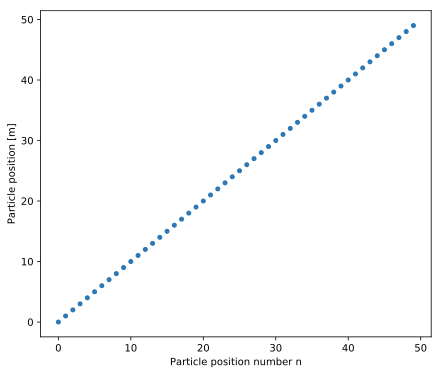

In [48]:
plt.figure(figsize=(7,6))

plt.plot(kk, x,'o',markerfacecolor=[0.22, 0.45, 0.7], markersize=4)
plt.xlabel('Particle position number n')
plt.ylabel('Particle position [m]')

plt.show()
plt.close()

<div class="alert alert-block alert-info">Does $n$ exactly represent time, or is $n$ merely related to time (or is $n$ completely unrelated to the passage of time?)?</div>

***

## <a name="problem2"></a>  Problem 2

Suppose now we want to analyze a situation where the velocity is not constant, for instance in the case of an object falling in the earth' s gravitational field under the force of gravity (free fall). 

The object will have an acceleration a equal to $g$:

$$ a(t) = \frac{\partial v}{\partial t} = g$$

Integration of the acceleration gives us the velocity:

$$v(t) = \int a(t) $$

Consequently the velocity increases linearly with time of flight, or in equation form : 
$$ v(t) = g t$$ 
where we will assume the downward direction is positive and the initial velocity is 0. 

Or equation 2 now is defined by:

$$ x[n]=x[n−1]+v[n-1] \times \Delta t $$

with 

$$ v[n] = v[n-1] + g \times \Delta t $$

Let' s consider the following code 

## <a name="pylaws2"></a>  Implementation in Python 2

In [76]:
# Gravitational acceleration m/s-2
g = 9.8
# Time step s
dt = 0.01
# Position of the particle at time t=0
x0 = 0.
# Velocity of the particle at time t=0
v0 = 0.
# Range of n values representing the discretisation of the object position
kk = np.arange(0,501,1)
# Initialisation of the particle position vector
x = np.zeros(501,dtype=float)
# Initialisation of the particle velocity vector
v = np.zeros(501,dtype=float)

Now we compute the system of equations:

In [73]:
v[0] = v0
x[0] = x0

for k in range(1,501):
    v[k] = v[k-1]+g*dt
    x[k] = x[k-1]+v[k-1]*dt

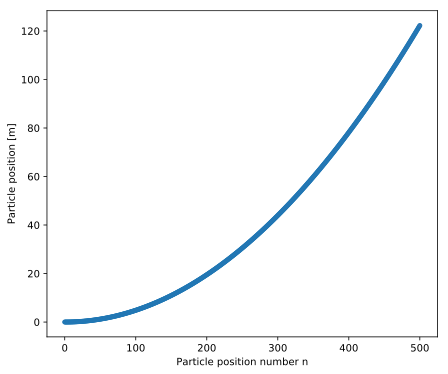

In [64]:
plt.figure(figsize=(7,6))

plt.plot(kk, x,'o',markerfacecolor=[0.22, 0.45, 0.7], markersize=4)
plt.xlabel('Particle position number n')
plt.ylabel('Particle position [m]')

plt.show()
plt.close()

<div class="alert alert-block alert-info">For the input values, what is the time interval described in the plot above? Let' s see how our discrete model compares with the solution we expect?</div>

Integration of the velocity $v(t) = v0 + g\times t$ gives the following function for the object position:

$$x(t)= v0 \times t + \frac{1}{2} \times g \times t^2$$

with $v0$ set to 0. it comes to:

$$x(t) = \frac{1}{2} \times g \times t^2$$

at the end of the experiment we have a time $te = n \times dt$

In [72]:
print 'end time: ',500*dt
print 'exact solution: ',0.5*g*(500*dt)**2
print 'model solution: ',x[-1]
print 'ratio exact/model: ',0.5*g*(500*dt)**2/x[-1]

end time:  5.0
exact solution:  122.5
model solution:  122.25499999999963
ratio exact/model:  1.0020040080160353


<div class="alert alert-block alert-info">Pretty close but not exact. **Our two answers are off by 0.2 %**. What might be causing even this small amount of error?</div>

Let' s see what happens if we amend the code slightly :

In [77]:
v[0] = v0
x[0] = x0

for k in range(1,501):
    v[k] = v[k-1]+g*dt
    x[k] = x[k-1]+0.5*(v[k]+v[k-1])*dt

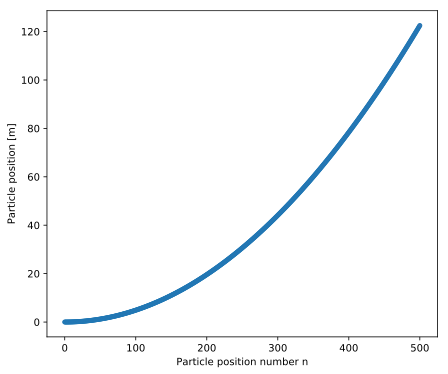

In [78]:
plt.figure(figsize=(7,6))

plt.plot(kk, x,'o',markerfacecolor=[0.22, 0.45, 0.7], markersize=4)
plt.xlabel('Particle position number n')
plt.ylabel('Particle position [m]')

plt.show()
plt.close()

In [79]:
print 'end time: ',500*dt
print 'exact solution: ',0.5*g*(500*dt)**2
print 'model solution: ',x[-1]
print 'ratio exact/model: ',0.5*g*(500*dt)**2/x[-1]

end time:  5.0
exact solution:  122.5
model solution:  122.49999999999962
ratio exact/model:  1.0000000000000033


<div class="alert alert-block alert-info">What did we do that was different, how else might we have reduced our error?</div>